# Part II: Dataset2

**1. Load the data file into a Spark DataFrame (1st DataFrame) and describe its structure**

In [1]:
# Install PySpark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=a3b00f9a89d4cb4dc53cb810906ba818a175d4c0e9e4f7340e10394f7a5a2548
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

In [3]:
# Initialize Spark session
spark = SparkSession.builder.appName("BigDataAnalytics").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/25 20:08:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# Load the CSV file into a Spark DataFrame
df3 = spark.read.csv("/kaggle/input/dataset2/dataset2.csv", header=True, inferSchema=True)



In [5]:
# Describe the structure of the DataFrame
df3.printSchema()




root
 |-- X1: integer (nullable = true)
 |-- X2: double (nullable = true)
 |-- X3: double (nullable = true)
 |-- X4: double (nullable = true)
 |-- X5: double (nullable = true)
 |-- X6: integer (nullable = true)
 |-- X7: double (nullable = true)
 |-- X8: double (nullable = true)
 |-- X9: double (nullable = true)
 |-- X10: string (nullable = true)



In [6]:
df3.show(5)

+--------+----+---+------------------+--------+-----+--------+----+-----+--------------------+
|      X1|  X2| X3|                X4|      X5|   X6|      X7|  X8|   X9|                 X10|
+--------+----+---+------------------+--------+-----+--------+----+-----+--------------------+
|34811059|2.73|0.1| 3.328944661018629| 24.5962|12314|129.9049|75.3| 29.5|Middle East & Nor...|
|19842251|6.43|2.0|1.4743533878509398|22.25083| 7103|130.1247|58.3|192.0|  Sub-Saharan Africa|
|40381860|2.24|0.5|       4.785169983| 27.5017|14646|118.8915|75.5| 15.4|             America|
| 2975029| 1.4|0.1|       1.804106217|25.35542| 7383|132.8108|72.5| 20.0|Europe & Central ...|
|21370348|1.96|0.1|       18.01631327|27.56373|41312|117.3755|81.5|  5.2| East Asia & Pacific|
+--------+----+---+------------------+--------+-----+--------+----+-----+--------------------+
only showing top 5 rows



In [7]:
# Number of rows and columns
print(f"Number of rows: {df3.count()}")
print(f"Number of columns: {len(df3.columns)}")

Number of rows: 139
Number of columns: 10


**2. Create a new DataFrame (2nd DataFrame) by removing the ‘X10’ column**

In [8]:
# Remove the X10 column
df4 = df3.drop("X10")



In [9]:
df4.show(5)

+--------+----+---+------------------+--------+-----+--------+----+-----+
|      X1|  X2| X3|                X4|      X5|   X6|      X7|  X8|   X9|
+--------+----+---+------------------+--------+-----+--------+----+-----+
|34811059|2.73|0.1| 3.328944661018629| 24.5962|12314|129.9049|75.3| 29.5|
|19842251|6.43|2.0|1.4743533878509398|22.25083| 7103|130.1247|58.3|192.0|
|40381860|2.24|0.5|       4.785169983| 27.5017|14646|118.8915|75.5| 15.4|
| 2975029| 1.4|0.1|       1.804106217|25.35542| 7383|132.8108|72.5| 20.0|
|21370348|1.96|0.1|       18.01631327|27.56373|41312|117.3755|81.5|  5.2|
+--------+----+---+------------------+--------+-----+--------+----+-----+
only showing top 5 rows



**3. Explore and describe the relationship between ‘X2’ and ‘X8’**

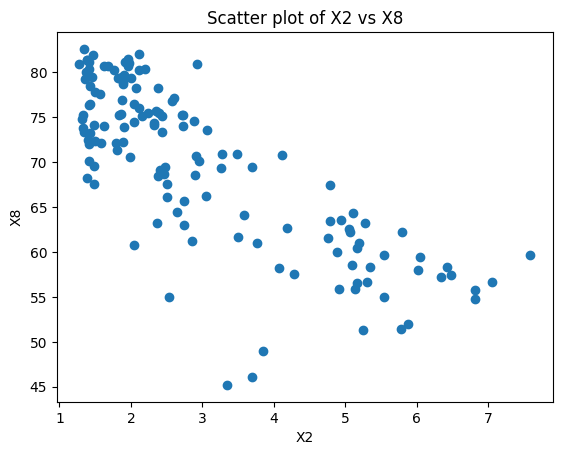

In [10]:
# Convert to Pandas for plotting
x2_x8_pd = df4.select("X2", "X8").toPandas()

# Scatter plot
plt.scatter(x2_x8_pd["X2"], x2_x8_pd["X8"])
plt.xlabel("X2")
plt.ylabel("X8")
plt.title("Scatter plot of X2 vs X8")
plt.show()


**4. Use Spark SQL query to display the ‘X2’ and ‘X8’ columns where ‘X2’ is greater than 1.0 and ‘X8’ is greater than 70**

In [11]:
# Create a temporary view for Spark SQL
df4.createOrReplaceTempView("data_table")

# Query
query = "SELECT X2, X8 FROM data_table WHERE X2 > 1.0 AND X8 > 70"
result = spark.sql(query)
result.show()


+----+----+
|  X2|  X8|
+----+----+
|2.73|75.3|
|2.24|75.5|
| 1.4|72.5|
|1.96|81.5|
|1.41|80.4|
|1.99|70.6|
|1.89|72.2|
|1.83|75.3|
|1.42|70.1|
|1.82|79.4|
|2.91|70.7|
|3.48|70.9|
| 1.9|73.9|
|1.43|73.2|
|1.68|80.7|
|1.89|78.9|
|2.43|75.1|
|1.91|79.7|
|1.43|76.5|
| 1.5|77.8|
+----+----+
only showing top 20 rows



**5. Build a linear regression model to predict the ‘X8’ column using ‘X2’ as the predictor and evaluate its performance**

In [12]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression

In [13]:
# Prepare the data for modeling
assembler = VectorAssembler(inputCols=["X2"], outputCol="features")
df4_features = assembler.transform(df4)


In [14]:
# Linear Regression Model
lr = LinearRegression(labelCol="X8", featuresCol="features")
lr_model = lr.fit(df4_features)
lr_predictions = lr_model.transform(df4_features)


24/07/25 20:08:25 WARN Instrumentation: [389170f7] regParam is zero, which might cause numerical instability and overfitting.
24/07/25 20:08:25 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/07/25 20:08:25 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [15]:
# Performance Evaluation
evaluator = RegressionEvaluator(labelCol="X8", predictionCol="prediction", metricName="rmse")
lr_rmse = evaluator.evaluate(lr_predictions)
lr_r2 = lr_model.summary.r2

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R^2: {lr_r2}")

Linear Regression RMSE: 5.608600191393089
Linear Regression R^2: 0.6192442167740035


**6. Build a Lasso regression model to predict the ‘X8’ column using all other columns as predictors and evaluate its performance**

In [16]:
# Prepare the data for modeling
feature_columns = [col for col in df4.columns if col != "X8"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df4_features = assembler.transform(df4)

In [17]:
# Lasso Regression Model (using ElasticNet with alpha=1)
lasso = LinearRegression(labelCol="X8", featuresCol="features", regParam=0.1, elasticNetParam=1.0)
lasso_model = lasso.fit(df4_features)
lasso_predictions = lasso_model.transform(df4_features)


In [18]:
# Performance Evaluation
evaluator = RegressionEvaluator(labelCol="X8", predictionCol="prediction", metricName="rmse")
lasso_rmse = evaluator.evaluate(lasso_predictions)
lasso_r2 = lasso_model.summary.r2

print(f"Lasso Regression RMSE: {lasso_rmse}")
print(f"Lasso Regression R^2: {lasso_r2}")

Lasso Regression RMSE: 2.9285969481850747
Lasso Regression R^2: 0.8961858017010297
